# Capstone Project - Data Science @ BrainStation

##  Introduction

This Jupiter notebook forms the core component of my Capstone project under the Data Science Diploma Program at BrainStation, Vancouver. In this notebook, we use base Python together with some of the widely used libraries to investigate, analyse a dataset sourced from loan data released by Lending Club, a US-based peer-to-peer lender. At it's peak, Lending club was largest P2P lender in the world with assets of ~16 billion USD. The dataset contains the features of various loans extended by Lending Club spanning from 2007 and 2018 and the corresponding details of the borrowers, who had availed the loan. The key detail of the loan captured in the dataset is 'loan_status', which has two values 'Fully Paid' or 'Charged Off', which means all these loans have been closed and there are no running loans in this dataset.

The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/jeandedieunyandwi/lending-club-dataset/code?datasetId=608703&sortBy=voteCount).

In this note, I will be demonstrating how to perform EDA, visualise data, and apply some machine learning techniques to solves problem of prediction.


## Table of Contents
[1. Loading data & checking high-level details](#Step-1:-Loading-data-&-checking-high-level-details) <br>
- [Data Dictionary](#Data-Dictionary)



[2. Verifying assumptions associated with linear regression models](#Step-2:-Verifying-assumptions-associated-with-linear-regression-models) <br>
- [Linearity](#2.1.-Linearity) <br>
- [Independence](#2.2.-Independence-or-No-Multicollienearity)
- [Normality](#2.3.-Residuals-Are-Normally-Distributed)
- [Homoscedasticity](#2.4.-Homoscedasticity)

[3. Variable selection for model](#Step-3:-Variable-selection-for-model) <br>
- [Backward or Top-Down approach](#3.1.-Backward-or-Top-Down-approach)
- [Forward or Bottom-Up approach](#3.2.-Forward-or-Bottom-Up-approach)

[4. Model Diagnostics](#Step-4:-Model-Diagnostics)
- [Residuals](#4.1.-Residuals)
- [Homoscedasticity](#4.2-Homoscedasticity)

[5. Conclusion](#5.-Conclusion)

### Data Dictionary

| S.No | Column Name           | Description                                                                                                 |
|------|-----------------------|-------------------------------------------------------------------------------------------------------------|
| 0    | loan_amount           | The listed amount of the loan in USD applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.|
| 1    | term                  | The number of payments on the loan. Values are in months and can be either 36 or 60.                          |
| 2    | int_rate              | Interest Rate on the loan                                                                                    |
| 3    | installment           | The monthly payment owed by the borrower                                                                    |                                           
| 4    | grade                 | Lending Club assigned loan grade                                                                                      |
| 5    | sub_grade             | Lending Club assigned loan subgrade                                                                                   |
| 6    | emp_title             | The job title supplied by the Borrower when applying for the loan.                                          |   
| 7    | emp_length            | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.|
| 8    | home_ownership        | The homeownership status provided by the borrower during registration or obtained from the credit report. The values are: RENT, OWN, MORTGAGE, OTHER|
| 9    | annual_inc            | The self-reported annual income provided by the borrower during registration.                                 |
| 10   | verification_status   | Indicates if income was verified by LC, not verified, or if the income source was verified                    |
| 11   | issue_d               | The month which the loan was funded                                                                         |
| 12   | loan_status           | Current status of the loan                                                                                 |
| 13   | purpose               | A category provided by the borrower for the loan request.                                                   |
| 14   | title                 | The loan title provided by the borrower                                                                    |
| 15   | zip_code              | The first 3 numbers of the zip code provided by the borrower in the loan application.                         |
| 16   | addr_state            | The state provided by the borrower in the loan application                                                  |
| 17   | dti                   | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.|
| 18   | earliest_cr_line      | The month the borrower's earliest reported credit line was opened                                            |
| 19   | open_acc              | The number of open credit lines in the borrower's credit file.                                               |
| 20   | pub_rec               | Number of derogatory public records                                                                        |
| 21   | revol_bal             | Total credit revolving balance                                                                             |
| 22   | revol_util            | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.|
| 23   | total_acc             | The total number of credit lines currently in the borrower's credit file                                     |
| 24   | initial_list_status   | The initial listing status of the loan. Possible values are – W, F. W stands for Whole loan and F stands for fractional.                                           |
| 25   | application_type      | Indicates whether the loan is an individual application or a joint application with two co-borrowers         |
| 26   | mort_acc              | Number of mortgage accounts.                                                                               |
| 27   | pub_rec_bankruptcies  | Number of public record bankruptcies 

## Data Exploration

In [1]:
#Import the required libraries

import numpy as np # Linear alzebra
import pandas as pd # Data manipulation

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import hvplot.pandas 

# import library to filter warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
# read CSV using pandas and name data fram as raw_df
raw_df = pd.read_csv("lending_club_loan_two.csv")

In [3]:
# Check for the size of the dataset
raw_df.shape

(396030, 27)

Data frame has 396030 rows or observations and 27 columns

In [4]:
# Change the default pandas dataframe display option to enable viewing all columns of the dataframe
pd.set_option('display.max_columns', None) # This option is enabled to look at all the columns in a data frame

In [5]:
# Take a glimpse of the dataframe
raw_df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
# Check the column names and data types
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**Datatypes:** Column `Term` could transformed from object to numeric.

**Datatypes:** Column `Term` could transformed from object to numeric later on.

**Feature Engineering**: 
1. New columns `month` and `year` could be extracted from `issue_d` column  
2. New columns `city`, `state` and `pincode` could be extracted from `address` column 
3. New column `inc_by_loan` = (`annual_inc`)/(`loan_amnt`) could be calculated.
4. New column `debt` = `dti` * `annual_inc` could be calculated


### Unique values

In [7]:
# Percentage of unique values in columns, which

# Calculate number of unique values in each column of data frame
unique_values = raw_df.nunique()

# Calculate total values in each column
count_values  = raw_df.count()

# Calculate percentage of unique values and sort the values in descending order
percentage_unique_values = (unique_values * 100 / count_values).sort_values(ascending = False)

# Print the percentages, rounded to one decimal
display(percentage_unique_values.round())

address                 99.0
emp_title               46.0
installment             14.0
revol_bal               14.0
title                   12.0
annual_inc               7.0
dti                      1.0
loan_amnt                0.0
revol_util               0.0
earliest_cr_line         0.0
int_rate                 0.0
total_acc                0.0
issue_d                  0.0
open_acc                 0.0
mort_acc                 0.0
sub_grade                0.0
pub_rec                  0.0
purpose                  0.0
emp_length               0.0
pub_rec_bankruptcies     0.0
grade                    0.0
home_ownership           0.0
application_type         0.0
verification_status      0.0
term                     0.0
loan_status              0.0
initial_list_status      0.0
dtype: float64

**Observations**

* Any column having high percentage of unique values makes it difficult to summarise and analyse. Further, it is difficult to apply encoding.  
* `address`:  99% percent of addresses are unique. We may drop this column after we extract city, state and pin code values. We 
* `emp_title`: 46% percent of employee titles are unique. Similar to address, employee title column is not useful for analysis and may be dropped.

In [8]:
# drop the 'emp_title' column
raw_df = raw_df.drop(columns = ['emp_title'])

### Summary Statistics of Dataset

In [9]:
# Calculate brief summary statistics
raw_df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14114.0,8357.0,500.0,8000.0,12000.0,20000.0,40000.0
int_rate,396030.0,14.0,4.0,5.0,10.0,13.0,16.0,31.0
installment,396030.0,432.0,251.0,16.0,250.0,375.0,567.0,1534.0
annual_inc,396030.0,74203.0,61638.0,0.0,45000.0,64000.0,90000.0,8706582.0
dti,396030.0,17.0,18.0,0.0,11.0,17.0,23.0,9999.0
open_acc,396030.0,11.0,5.0,0.0,8.0,10.0,14.0,90.0
pub_rec,396030.0,0.0,1.0,0.0,0.0,0.0,0.0,86.0
revol_bal,396030.0,15845.0,20592.0,0.0,6025.0,11181.0,19620.0,1743266.0
revol_util,395754.0,54.0,24.0,0.0,36.0,55.0,73.0,892.0
total_acc,396030.0,25.0,12.0,2.0,17.0,24.0,32.0,151.0


1. **loan_amount** The average loan is ~14,113 USD. Min loan amount is 500.00 USD and max is 40,000.00 USD. 
2. **int_rate**	The interest rate on an average is 13.63%

### Target Variable

For this dataset, loan_status is chosed as the target variable. Lets the all the unique values in the target variable.


In [18]:
raw_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

`loan_status` takes binary values "Fully Paid" and "Charged Off"

"Fully Paid" signifies that the borrower has completely repaid the loan.

"Charged Off" indicates that the loan has not been fully repaid, resulting in a portion being written off.

To run statistical analysis, we represent these strings numerically. 

In this notebook, "Charged Off" is assigned value 0 and "Fully Paid" is assigned the value 1.

In [19]:
# Use Map function to assign 'Charged Off' to 0 and 'Fully Paid' to 1 in the 'loan_status' column
raw_df['loan_status'] = raw_df['loan_status'].map({'Charged Off': 0, 'Fully Paid': 1})

### Duplicates

In [10]:
# check for duplicate rows
raw_df.duplicated().sum() 

0

There are no duplicate rows in the dataset.

### Null Values

In [11]:
# Calculate the number of nulls in each column
columns_null_count = raw_df.isna().sum(axis=0)

# Total rows in data frame
total_rows = raw_df.shape[0]

# Calculate percentage of nulls and apply filter of non-zero null count in column
percentage_of_nulls = (columns_null_count * 100 / total_rows).round(2)

# Filter columns with non-zero null count
non_zero_nulls = percentage_of_nulls[percentage_of_nulls != 0]

# Print percentage of nulls in the columns having null values decreasing order
print(non_zero_nulls.sort_values(ascending = False))

mort_acc                9.54
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
dtype: float64


 **Observations:** 
 
 * Column `mort_acc` has almost 10% of its values as null. 
 * Column `emp_title` and column `emp_length` has a fair percentage (5.79% and 4.62% respectively) of its values as null.
 * Column `title` has 0.44% of its values as null.
 * Other columns shown above have insignificant null percentage.

#### Handling Null values in columns
* `revol_util` and `pub_rec_bankruptcies`: These columns have low percentage of null values. We may remove the rows with null values in these columns. 
* There are null values in columns emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies. These nulls have to handled appropriately.

**I. Null values in `revol_util` and `pub_rec_bankruptcies`**

In [12]:
# Use dropna()method to drop rows with NA values in columns `revol_util` and `pub_rec_bankruptcies`
raw_df = raw_df.dropna(subset=['revol_util', 'pub_rec_bankruptcies'])

We have removed the rows with NA values in columns `revol_util` and `pub_rec_bankruptcies`. 

**II. Null values in `emp_length`**

In [22]:
# Number of unique values in emp_length
print(f"Column `emp_length` has {raw_df['emp_length'].nunique()} unique values \n") 

# List the categories of unique values in emp_length
print(f"The categories are as under: \n\n {raw_df['emp_length'].unique()}")

Column `emp_length` has 11 unique values 

The categories are as under: 

 ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


Since `emp_length` has 4.62% of null values, it may not be prudent to remove the corresponding rows as we may lose important patterns in data. Let's examine how the distribution of `loan_status` is with respect to various categories of `emp_length` to understand how the distribution changes.

We use the crosstab approach to understand this.

In [14]:
# Compute a simple cross tabulation of ''emp_length' and 'loan_status'. 
cross_tab = pd.crosstab(index=raw_df['emp_length'], columns=raw_df['loan_status'], normalize='index').round(2)

# print normalised porportions for each category of emp_length
print(cross_tab)

loan_status  Charged Off  Fully Paid
emp_length                          
1 year              0.20        0.80
10+ years           0.18        0.82
2 years             0.19        0.81
3 years             0.20        0.80
4 years             0.19        0.81
5 years             0.19        0.81
6 years             0.19        0.81
7 years             0.19        0.81
8 years             0.20        0.80
9 years             0.20        0.80
< 1 year            0.21        0.79


In [15]:
raw_df['emp_length_numeric'] = raw_df['emp_length'].map({
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    None: None  # to handle NaN values
})

In [23]:
#  Check correlation between emp_length_numeric','emp_length'

raw_df[['emp_length_numeric','loan_status']].corr()

,emp_length_numeric,loan_status
emp_length_numeric,1.000000,0.013805
loan_status,0.013805,1.000000


In [34]:
# Drop columns emp_length_numeric','emp_length'
raw_df = raw_df.drop(columns = ['emp_length_numeric','emp_length'])

The above data that the proportions are quite consistent across different employment lengths. This indicates that practical impact of `emp_length` on predicting `loan_status` is limited. We may proceed to remove this column.

In [18]:
#from scipy.stats import chi2_contingency

#Create a contingency table
#contingency_table = pd.crosstab(raw_df['emp_length'], raw_df['loan_status'])

# Perform the Chi-Square test
#chi2, p, dof, expected = chi2_contingency(contingency_table)

#print("Chi-Square Statistic:", chi2)
#print("P-value:", p)
#print("Degrees of Freedom:", dof)
#print("Expected Frequencies:\n", expected)

**III. Null values in `title`**

In [ ]:
# Calculate the top 5 most frequently ocurring categories in column 'title'
raw_df['title'].value_counts()[:5] 

It looks like there are many duplicated categories. For instance, Debt consolidation is captured as different values. We can merge the categories to reduce the number of categories. 

Let us look at the `title` column and compare with `purpose` column.

In [37]:
raw_df[['purpose','title']].sample(5)

,purpose,title
354826,debt_consolidation,Debt consolidation
227045,debt_consolidation,Debt consolidation
170693,debt_consolidation,Debt consolidation
90767,credit_card,Credit card refinancing
315206,debt_consolidation,Debt consolidation


We observe that it has values similar to the purpose column. Infact, the `purpose` column appears to have input validation control and `title` column has appears to be more customised text. We may proceed to remove the `title` column.

In [39]:
raw_df = raw_df.drop(columns = ['title'])

**IV. Null values in `mort_acc`**

In [24]:
raw_df[['mort_acc','loan_status']].corr()

,mort_acc,loan_status
mort_acc,1.000000,0.073048
loan_status,0.073048,1.000000


In [25]:
raw_df[['mort_acc','loan_status']].sample(5)

,mort_acc,loan_status
251844,1.0,0
135277,4.0,1
127826,4.0,1
165721,6.0,1
175716,2.0,0


In [28]:
raw_df.corr()['mort_acc'].round(1)

loan_amnt               0.2
int_rate               -0.1
installment             0.2
annual_inc              0.2
loan_status             0.1
dti                    -0.0
open_acc                0.1
pub_rec                 0.0
revol_bal               0.2
revol_util              0.0
total_acc               0.4
mort_acc                1.0
pub_rec_bankruptcies    0.0
emp_length_numeric      0.2
Name: mort_acc, dtype: float64

In [29]:
raw_df['mort_acc'].value_counts()

0.0     139708
1.0      60384
2.0      49907
3.0      38022
4.0      27865
5.0      18182
6.0      11059
7.0       6050
8.0       3120
9.0       1653
10.0       863
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [35]:
raw_df['mort_acc'].fillna(raw_df['mort_acc'].mean(), inplace=True)

In [40]:
raw_df.isnull().sum() # checking for nulls

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [ ]:
numeric_df = raw_df.select_dtypes("number")

plot_num = 1

plt.subplots(6,2, figsize=(20,20))

for col in numeric_df.columns:
    plt.subplot(6,2,plot_num)
    sns.histplot(raw_df[col])
    plot_num +=1

plt.tight_layout()
plt.show()

In [ ]:
cols_with_outliers = ['annual_inc', 'dti', 'revol_bal', 'revol_util']

plt.subplots(2,2, figsize=(15,5.5))
plot_num = 1

for col in cols_with_outliers:
    q1 = raw_df[col].quantile(0.25)
    q3 = raw_df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = raw_df[(raw_df[col] >= lower_bound) & (raw_df[col] <= upper_bound)]

    plt.subplot(2, 2, plot_num)  # Adjust the subplot grid as needed
    
    sns.histplot(filtered_data[col])
    plt.title(f"Distribution of {col} (excluding outliers)")
    plt.xlabel(col)
    plt.ylabel("Number of Loans")

    plot_num += 1

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
#categorical_cols = ['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status',
                  #'issue_d', 'loan_status','purpose','title','initial_list_status','application_type']

categorical_cols = ['term','grade','emp_length','home_ownership','verification_status','loan_status',
                   'initial_list_status','application_type']

plot_num = 1

plt.subplots(4, 2, figsize=(15, 10))

for col in categorical_cols:
    plt.subplot(4, 2, plot_num)
    
    # Calculate normalized counts manually
    counts = raw_df[col].value_counts(normalize=True)
    
    # Plot the bar chart
    sns.barplot(x=counts.index, y=counts.values)
    
    plt.title(f"Normalized Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plot_num += 1

plt.tight_layout()
plt.show()

In [ ]:
categorical_df = raw_df.select_dtypes("object")
categorical_df.columns

1. Maximum loans are in the range of 5k to 12.5k USD.
2. Minimum loans are extended in range of 27k to 32k USD.


Most loans are in the range of 11% to 16%. The loans above 21% taper off.

In [ ]:
rates = raw_df.groupby(["grade", "term"])["term"].count()/raw_df.groupby(["grade"])["term"].count()
rates.unstack().plot(kind="barh", stacked=True)
sns.despine()

In [ ]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(raw_df.corr(), dtype=bool))

# Set up the figure with size
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask
sns.heatmap(data = raw_df.corr(), cmap="coolwarm", annot=True, mask=mask)

plt.show()


In [ ]:
raw_df['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

## Exploring columns with null values

We had earlier seem that some of the columns have null values. Let's calculate the percentages of nulls in these columns.

In [26]:
raw_df.corr()['mort_acc'].round(1)

loan_amnt               0.2
int_rate               -0.1
installment             0.2
annual_inc              0.2
loan_status             0.1
dti                    -0.0
open_acc                0.1
pub_rec                 0.0
revol_bal               0.2
revol_util              0.0
total_acc               0.4
mort_acc                1.0
pub_rec_bankruptcies    0.0
emp_length_numeric      0.2
Name: mort_acc, dtype: float64

In [27]:
raw_df['mort_acc'].value_counts()

0.0     139708
1.0      60384
2.0      49907
3.0      38022
4.0      27865
5.0      18182
6.0      11059
7.0       6050
8.0       3120
9.0       1653
10.0       863
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
raw_df[raw_df['mort_acc'].notna()].corr()['mort_acc'].round(1)

The highest correlation is observed for `total_acc`, but the same is not high enough for us to be able to delete the same.

 We observe there is no common ratio. There is some relation between `mort_acc` and `loan_status`. So, we may not delete the column and instead proceed with imputation by filling with some value. We can use the fillna() method for imputation of `mort_acc'. 

As we explored all the columns which have null values, we proceed with dropping all columns with null values, except for `mort_acc`

In [42]:
raw_df['mort_acc'].fillna(raw_df['mort_acc'].mean(), inplace=True)

In [43]:
raw_df.isnull().sum() # checking for nulls

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

After dropping some columns, let us extract categorical columns again from raw_df

In [44]:
raw_df = raw_df.drop(columns = ['sub_grade'])

In [45]:
import re

# Assuming raw_df is your original dataframe
# Extracting Month and Year from earliest_cr_line
raw_df['earliest_cr_line'] = pd.to_datetime(raw_df['earliest_cr_line'])
raw_df['earliest_cr_line_month'] = raw_df['earliest_cr_line'].dt.month
raw_df['earliest_cr_line_year'] = raw_df['earliest_cr_line'].dt.year

# Extracting State Code from address
state_pattern = r',\s(\w{2})\s\d+'
state_extract = raw_df['address'].str.extract(state_pattern)
raw_df['address_state_code'] = state_extract[0]

# Extracting Month and Year from issue_d
raw_df['issue_d'] = pd.to_datetime(raw_df['issue_d'])
raw_df['issue_d_month'] = raw_df['issue_d'].dt.month
raw_df['issue_d_year'] = raw_df['issue_d'].dt.year

# Calculate Annual_Income/Loan Amount
raw_df['annual_inc_loan_amnt_ratio'] = raw_df['annual_inc'] / raw_df['loan_amnt']

# Calculate Annual_Income/Interest Rate
raw_df['annual_inc_int_rate_ratio'] = raw_df['annual_inc'] / raw_df['int_rate']

# Calculate Debt using dti and Annual_Income
raw_df['debt'] = raw_df['dti'] * raw_df['annual_inc']

# Display the updated dataframe
print(raw_df.head())


   loan_amnt        term  int_rate  installment grade home_ownership  \
0    10000.0   36 months     11.44       329.48     B           RENT   
1     8000.0   36 months     11.99       265.68     B       MORTGAGE   
2    15600.0   36 months     10.49       506.97     B           RENT   
3     7200.0   36 months      6.49       220.65     A           RENT   
4    24375.0   60 months     17.27       609.33     C       MORTGAGE   

   annual_inc verification_status    issue_d  loan_status             purpose  \
0    117000.0        Not Verified 2015-01-01            1            vacation   
1     65000.0        Not Verified 2015-01-01            1  debt_consolidation   
2     43057.0     Source Verified 2015-01-01            1         credit_card   
3     54000.0        Not Verified 2014-11-01            1         credit_card   
4     55000.0            Verified 2013-04-01            0         credit_card   

     dti earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  \
0  26.24 

In [46]:
columns_to_drop = ['address', 'earliest_cr_line', 'issue_d']
raw_df.drop(columns=columns_to_drop, inplace=True)

In [47]:
categorical_df = raw_df.select_dtypes("object")


In [48]:
dummies_df = pd.get_dummies(categorical_df, drop_first=True)

# Now, concatenate the numerical columns with the original dataframe

processed_df = pd.concat([raw_df, dummies_df], axis=1)

# Drop the original categorical columns if needed
processed_df = processed_df.drop(categorical_df.columns, axis=1)



# Now, processed_df contains the original numerical columns and the one-hot encoded categorical columns

In [49]:
processed_df = processed_df.drop(columns=["revol_bal","installment","revol_util","open_acc","grade_B","grade_C","grade_D","grade_E","purpose_moving","purpose_other","purpose_renewable_energy","purpose_small_business","purpose_vacation","purpose_wedding"])

In [50]:
processed_df = processed_df.drop(columns = ["grade_F","grade_G","home_ownership_MORTGAGE","home_ownership_NONE","home_ownership_OTHER","home_ownership_OWN","home_ownership_RENT","verification_status_Source Verified","verification_status_Verified","purpose_credit_card","purpose_debt_consolidation","purpose_educational","purpose_home_improvement","purpose_house","purpose_major_purchase","purpose_medical","initial_list_status_w"])

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Select features (X) and target variable (y)
X = processed_df.drop('loan_status', axis=1)  #  'loan_status' is target variable
y = processed_df['loan_status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=49)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform all columns in training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform all columns in testing set
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [85]:
processed_df[processed_df['loan_status'] == 1].shape[0]/processed_df[['loan_status']].shape[0]

0.8038479931379817

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Initialize Logistic Regression model
model = LogisticRegression(random_state=449)

# Fit the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.8061

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.06      0.11     11585
           1       0.81      0.99      0.89     47698

    accuracy                           0.81     59283
   macro avg       0.67      0.52      0.50     59283
weighted avg       0.76      0.81      0.74     59283



accuracy: 0.8073

Accuracy is the ratio of correctly predicted observations to the total observations.
In this case, the model correctly predicts the class for approximately 80.73% of the instances.
Precision, Recall, and F1-Score for Class 0 (Charged Off)

Precision (Positive Predictive Value): 0.57
Of all instances predicted as "Charged Off," 57% were actually "Charged Off."
Recall (Sensitivity or True Positive Rate): 0.05
Of all actual "Charged Off" instances, only 5% were correctly predicted.
F1-Score: 0.10
The harmonic mean of precision and recall.

In [ ]:
C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, .1,
                   1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Iterate over different values of C
for C_value in C_range:
    my_logreg = LogisticRegression(C=C_value, random_state=1)

    # Fit the model on the training set
    my_logreg.fit(X_train_scaled, y_train)

    # Append training and testing scores to the respective lists
    train_scores.append(my_logreg.score(X_train_scaled, y_train))
    test_scores.append(my_logreg.score(X_test_scaled, y_test))

# Plotting results
plt.figure()
plt.plot(C_range, train_scores, label='Train Score', marker='.')
plt.plot(C_range, test_scores, label='Test Score', marker='.')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

Accuracy: 0.8073

Accuracy is the ratio of correctly predicted observations to the total observations.
In this case, the model correctly predicts the class for approximately 80.73% of the instances.
Precision, Recall, and F1-Score for Class 0 (Charged Off)

Precision (Positive Predictive Value): 0.57
Of all instances predicted as "Charged Off," 57% were actually "Charged Off."
Recall (Sensitivity or True Positive Rate): 0.05
Of all actual "Charged Off" instances, only 5% were correctly predicted.
F1-Score: 0.10
The harmonic mean of precision and recall.

In [79]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train, y_train are your training data
# Assuming class 0 is the minority class
class_weights = {0: 4, 1: 1}  # You can adjust the weights based on the imbalance ratio

model = LogisticRegression(class_weight=class_weights)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1e-07, class_weight={0: 4, 1: 1})

In [80]:
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.8021

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.09      0.16     23155
           1       0.82      0.97      0.89     95411

    accuracy                           0.80    118566
   macro avg       0.64      0.53      0.52    118566
weighted avg       0.75      0.80      0.75    118566



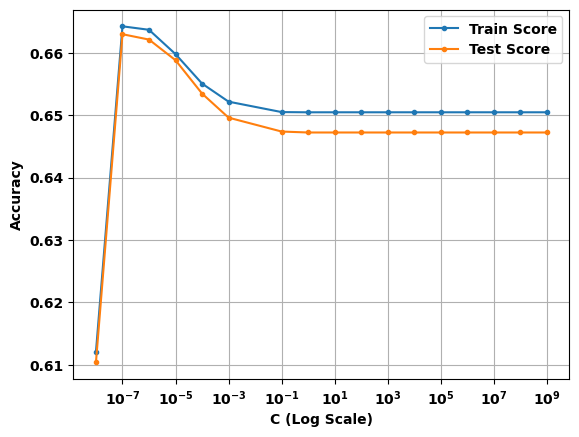

In [87]:
C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, .1,
                   1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])


# Lists to store training and testing scores
train_scores = []
test_scores = []

# Iterate over different values of C
for C_value in C_range:
    # Initialize Logistic Regression model with the current C value
    model = LogisticRegression(C = C_value, class_weight = 'balanced', random_state=1)

    # Fit the model on the training set
    model.fit(X_train_scaled, y_train)

     # Make predictions on the training set
    y_train_pred = model.predict(X_train_scaled)
    
    # Make predictions on the testing set
    y_test_pred = model.predict(X_test_scaled)

    # Append testing scores to the respective list
    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(C_range, train_scores, label='Train Score', marker='.')
plt.plot(C_range, test_scores, label='Test Score', marker='.')
plt.xlabel('C (Log Scale)')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

In [88]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the SMOTE class with desired sampling strategy (50:50 balance)
sampling_strategy = 1.0  # Adjust this to achieve a 50:50 balance
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


# Initialize Logistic Regression model
model = LogisticRegression(random_state=449)

# Fit the model on the resampled training set
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.6451

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.65      0.42     11585
           1       0.88      0.64      0.74     47698

    accuracy                           0.65     59283
   macro avg       0.60      0.65      0.58     59283
weighted avg       0.77      0.65      0.68     59283



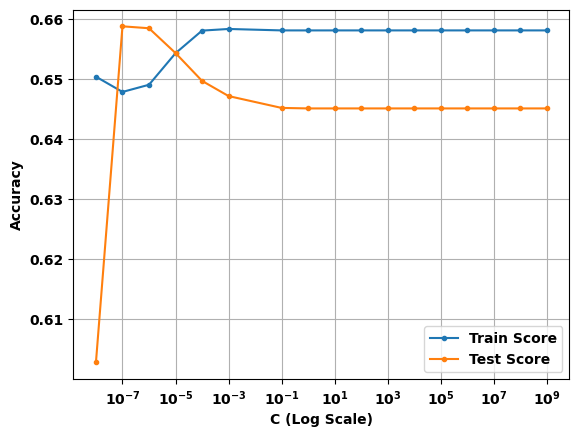

In [89]:
C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, .1,
                   1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])


# Lists to store training and testing scores
train_scores = []
test_scores = []

# Iterate over different values of C
for C_value in C_range:
    # Initialize Logistic Regression model with the current C value
    model = LogisticRegression(C=C_value, random_state=1)

    # Fit the model on the resampled training set
    model.fit(X_train_resampled, y_train_resampled)

     # Make predictions on the training set
    y_train_pred = model.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test_scaled)

    # Append testing scores to the respective list
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_pred))

# Plotting results
plt.figure()
plt.plot(C_range, train_scores, label='Train Score', marker='.')
plt.plot(C_range, test_scores, label='Test Score', marker='.')
plt.xlabel('C (Log Scale)')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Assuming 'y' is your output variable
class_counts = np.bincount(y_train_resampled)
class_0_count = class_counts[0]  # Count of class 0
class_1_count = class_counts[1]  # Count of class 1

print(f"Percentage of Class 0 : {class_0_count * 100 /(class_0_count+class_1_count)}")
print(f"Percentage of Class 1 : {class_1_count * 100 /(class_0_count+class_1_count)}")

In [ ]:
# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Lists to store training and testing scores
train_scores = []
test_scores = []

n_estimators_range = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Iterate over different values of n_estimators
for n_estimators_value in n_estimators_range:
    # Initialize Random Forest Classifier with the current n_estimators value
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators_value, random_state=42)
    
    # Fit the model on the training set
    rf_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = rf_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = rf_classifier.predict(X_test_scaled)
    
    # Append training and testing scores to the respective lists
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(n_estimators_range, train_scores, label='Train Score', marker='.')
plt.plot(n_estimators_range, test_scores, label='Test Score', marker='.')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()


In [ ]:
print("hello 12:01")